In [1]:
import os
from pathlib import Path
from keras.preprocessing import image
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Input, Convolution2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.utils import np_utils
import tensorflow as tf

In [2]:
p = Path("./smallDataset/")
dirs = p.glob("*")

image_data = []
labels = []
labels_dict = {}
c = 0;
for folder_dir in dirs:
    label = str(folder_dir).split("\\")[-1]
    labels_dict[label] = c
    c+=1
    
    cnt = 0
    for img_path in folder_dir.glob("*.jpg"):
        img = image.load_img(img_path,target_size=(28,28))
        img_array = image.img_to_array(img)
        image_data.append(img_array)
        labels.append(labels_dict[label])
        cnt+=1
    print(cnt)

175
125
155
155
155
160
170
155
165
170
160
160
160
140
160
160
160
155
160
160
160
160
160
160
160
160
279
160
160
160
160
160
156
170
160
160


In [49]:
X = np.array(image_data)
Y = np.array(labels)

In [50]:
from sklearn.utils import shuffle
X,Y = shuffle(X,Y,random_state=2)
X = X/255.0


In [51]:
# def drawImg(img, label):
#     print(img.shape)
#     plt.imshow(img, cmap = 'gray')
#     plt.show()

In [52]:
# for i in range(10):
#     r= np.random.randint(5000)
#     drawImg(X[r],Y[r])

In [53]:
split = int(X.shape[0]*.8)
X_ = np.array(X)
Y_ = np.array(Y)

X = X_[:split,:]
Y = Y_[:split]
XTest = X_[split:,:]
YTest = Y_[split:]
print(X.shape)
Y = np_utils.to_categorical(Y)
YTest = Y_[split:]
print(Y.shape)

# print(XTest.shape)

(4580, 28, 28, 3)
(4580, 36)


In [54]:
model = Sequential()
model.add(Convolution2D(32,(3,3),activation = 'relu', input_shape=(28,28,3)))
model.add(Convolution2D(64,(3,3),activation = 'relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(32,(5,5), activation = 'relu'))
model.add(Convolution2D(8,(5,5), activation = 'relu'))
model.add(Flatten())
model.add(Dense(36,activation = 'softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        896       
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 dropout_1 (Dropout)         (None, 24, 24, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 8, 8, 32)          51232     
                                                                 
 conv2d_7 (Conv2D)           (None, 4, 4, 8)           6408      
                                                      

In [55]:
model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [56]:
hist = model.fit(X, Y, epochs = 20, shuffle = True, batch_size = 256, validation_split = 0.20)

Epoch 1/20
15/15 [==============================] - 12s 657ms/step - loss: 3.4202 - accuracy: 0.0764 - val_loss: 3.1516 - val_accuracy: 0.1932
Epoch 2/20
15/15 [==============================] - 9s 627ms/step - loss: 2.6119 - accuracy: 0.3008 - val_loss: 2.1786 - val_accuracy: 0.4225
Epoch 3/20
15/15 [==============================] - 10s 635ms/step - loss: 1.5844 - accuracy: 0.5767 - val_loss: 1.3690 - val_accuracy: 0.6845
Epoch 4/20
15/15 [==============================] - 10s 642ms/step - loss: 0.9904 - accuracy: 0.7383 - val_loss: 1.0013 - val_accuracy: 0.7795
Epoch 5/20
15/15 [==============================] - 10s 632ms/step - loss: 0.7198 - accuracy: 0.8141 - val_loss: 0.7895 - val_accuracy: 0.8144
Epoch 6/20
15/15 [==============================] - 9s 628ms/step - loss: 0.5712 - accuracy: 0.8458 - val_loss: 0.7053 - val_accuracy: 0.8253
Epoch 7/20
15/15 [==============================] - 9s 621ms/step - loss: 0.4685 - accuracy: 0.8753 - val_loss: 0.6188 - val_accuracy: 0.8461
Ep

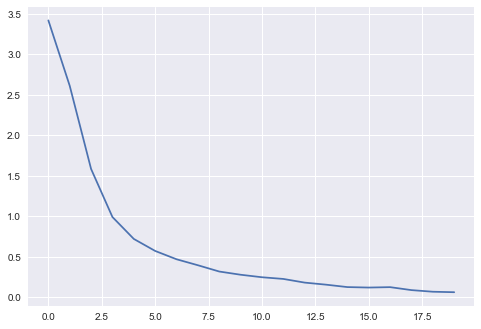

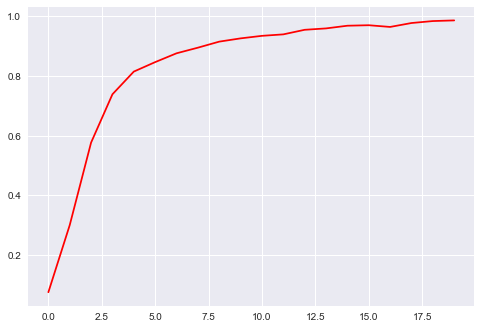

In [57]:
# plt.figure(0)
plt.style.use("seaborn")
plt.plot(hist.history['loss'],label = "loss")
# plt.plot(hist.history['val_loss'], 'b', label = "value loss")
plt.savefig("CNN loss")
plt.show()
plt.plot(hist.history['accuracy'],'red', label= 'Accuracy')
# plt.plot(hist.history['val_accuracy'], 'black', label = 'Value Accuracy')
plt.savefig("CNN acc")
plt.show()

In [58]:
YPredict = model.predict(XTest)
YPredict_train = model.predict(X)
# print(YPredict.shape)

# print(Y.shape[0])
# print(YTest.shape)
# print(YPredict)
YTest.shape
# Y.shape

(1146,)

In [59]:

s = 0

In [60]:
array = np.zeros((36,36), dtype = np.int64)

for i in range(YPredict.shape[0]):
    idx = np.argmax(YPredict[i])
    if(YTest[i] == idx):
        s+=1
#     l = label

    array[YTest[i]][idx]+=1

In [61]:
acc = s/YTest.shape[0]
print(acc)

0.9258289703315882


In [62]:
s = 0
for i in range(Y.shape[0]):
    idx = np.argmax(YPredict_train[i])
    if Y[i][0] == idx :
        s+=1
    

In [63]:
acc = s/Y.shape[0]
print(acc)

0.0058951965065502186


In [64]:
import seaborn as sns

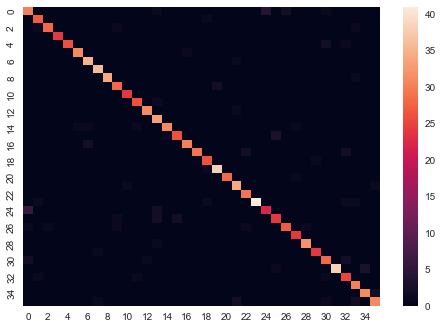

In [65]:
hm = sns.heatmap(array)
fig = hm.get_figure()
fig.savefig("CNN heatmap")